In [8]:
import pandas as pd
import json
import os
import re

In [9]:
pickle_files = [
    "./data/sonnet3.pkl",
    "./data/sonnet3.5-3.pkl",
    "./data/gpt-4o-3.pkl",
    "./data/gemini-1.5-pro-3.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df1 = pd.concat(dfs)

df1["prompt"] = "How many times do the blue and red line plots cross each other?"


pickle_files = [
    "./data/sonnet2.pkl",
    "./data/sonnet3.5-2.pkl",
    "./data/gpt-4o-2.pkl",
    "./data/gemini-1.5-pro-2.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df2 = pd.concat(dfs)

df2["prompt"] = "How many times do the blue and red lines intersect?"

In [10]:
df = pd.concat([df1, df2])

In [11]:
df

,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
0,image_0_thickness_2.png,3,1,"[red, blue]",2,The blue and red line segments intersect or cr...,1,True,Sonnet,How many times do the blue and red line plots ...
1,image_0_thickness_3.png,3,1,"[red, blue]",3,The blue and red line segments intersect or cr...,1,True,Sonnet,How many times do the blue and red line plots ...
2,image_0_thickness_4.png,3,1,"[red, blue]",4,The blue and red line segments cross each othe...,1,True,Sonnet,How many times do the blue and red line plots ...
3,image_1_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots cross each other a...,1,False,Sonnet,How many times do the blue and red line plots ...
4,image_1_thickness_3.png,3,2,"[red, blue]",3,The blue and red line segments intersect or cr...,1,False,Sonnet,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
147,image_49_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines do not intersect in the...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
148,image_49_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect **zero** time...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...


In [12]:
df.groupby(["Model", "prompt"]).count()

image_path  \
Model          prompt                                                           
Gemini-1.5-Pro How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
Sonnet         How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
Sonnet-3.5     How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
gpt-4o         How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   

                                                                   num_points  \
Model          prompt                                                           
Gemini-1.5-Pro How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
Sonnet         How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
Sonnet-3.5     How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
gpt-4o         How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   

                                                                   num_intersections  \
Model          prompt                                                                  
Gemini-1.5-Pro How many times do the blue and red line plots c...                150   
               How many times do the blue and red lines inters...                150   
Sonnet         How many times do the blue and red line plots c...                150   
               How many times do the blue and red lines inters...                150   
Sonnet-3.5     How many times do the blue and red line plots c...                150   
               How many times do the blue and red lines inters...                150   
gpt-4o         How many times do the blue and red line plots c...                150   
               How many times do the blue and red lines inters...                150   

                                                                   line_colors  \
Model          prompt                                                            
Gemini-1.5-Pro How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   
Sonnet         How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   
Sonnet-3.5     How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   
gpt-4o         How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   

                                                                   line_thickness  \
Model          prompt                                                               
Gemini-1.5-Pro How many times do the blue and red line plots c...             150   
               How many times do the blue and red lines inters...             150   
Sonnet         How many times do the blue and red line plots c...             150   
               How many times do the blue and red lines inters...             150   
Sonnet-3.5     How many times do the blue and red line plots c...             150   
               How many times do the blue and red lines inters...             150   
gpt-4o         How many times do the blue and red line plots c.

In [13]:
# Filter the dataframe for the specific prompt
df_prompt2 = df[df["prompt"] == "How many times do the blue and red lines intersect?"]

# Get all unique image_path values
all_images = set(df_prompt2["image_path"])

# Get image_path values for gpt-4o
gpt4o_images = set(df_prompt2[df_prompt2["Model"] == "gpt-4o"]["image_path"])

# Find the missing image
missing_image = all_images - gpt4o_images

if missing_image:
    print(f"The missing image for gpt-4o is: {missing_image.pop()}")
else:
    print("No missing image found.")

No missing image found.


In [14]:
# for each image_path we need to have all 3 models, one file is missing, which one that is
model_names = ["Gemini-1.5-Pro", "Sonnet", "Sonnet-3.5", "gpt-4o"]
missing_files = []

# Iterate over each unique image path
for image_path in df["image_path"].unique():
    # Check if all models are present for the current image path
    models_present = df[df["image_path"] == image_path]["Model"].unique()
    missing_models = set(model_names) - set(models_present)
    if missing_models:
        missing_files.append((image_path, missing_models))

# Display missing files and models
for missing in missing_files:
    print(f"Missing model(s) {missing[1]} for image {missing[0]}")

In [15]:
accuracy_per_model_and_word = df.groupby(["Model"])["is_correct"].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

accuracy_per_model_and_word.T.reset_index()

,Model,is_correct
0,Gemini-1.5-Pro,73.67
1,Sonnet,62.33
2,Sonnet-3.5,84.67
3,gpt-4o,47.33


Model
Gemini-1.5-Pro    77.33
Sonnet            49.33
gpt-4o            46.31
Name: is_correct, dtype: float64

In [16]:
# Group by both Model and line_thickness
accuracy_per_model_thickness = df.groupby(["Model", "line_thickness"])[
    "is_correct"
].mean()

# Convert the accuracy to percentage
accuracy_per_model_thickness = accuracy_per_model_thickness * 100
# Round to 2 decimal places
accuracy_per_model_thickness = accuracy_per_model_thickness.round(2)

accuracy_per_model_thickness.reset_index()

,Model,line_thickness,is_correct
0,Gemini-1.5-Pro,2,73.0
1,Gemini-1.5-Pro,3,71.0
2,Gemini-1.5-Pro,4,77.0
3,Sonnet,2,57.0
4,Sonnet,3,63.0
5,Sonnet,4,67.0
6,Sonnet-3.5,2,85.0
7,Sonnet-3.5,3,84.0
8,Sonnet-3.5,4,85.0
9,gpt-4o,2,48.0


In [17]:
accuracy_per_model_and_prompt = df.groupby(["Model", "prompt"])["is_correct"].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_and_prompt = (accuracy_per_model_and_prompt * 100).round(2)

# Display the result
accuracy_per_model_and_prompt

Model           prompt                                                         
Gemini-1.5-Pro  How many times do the blue and red line plots cross each other?    69.33
                How many times do the blue and red lines intersect?                78.00
Sonnet          How many times do the blue and red line plots cross each other?    60.67
                How many times do the blue and red lines intersect?                64.00
Sonnet-3.5      How many times do the blue and red line plots cross each other?    82.00
                How many times do the blue and red lines intersect?                87.33
gpt-4o          How many times do the blue and red line plots cross each other?    48.00
                How many times do the blue and red lines intersect?                46.67
Name: is_correct, dtype: float64

In [18]:
accuracy_per_model_prompt_thickness = df.groupby(["Model", "prompt", "line_thickness"])[
    "is_correct"
].mean()

# Convert the accuracy to percentage
accuracy_per_model_prompt_thickness = accuracy_per_model_prompt_thickness * 100
# Round to 2 decimal places
accuracy_per_model_prompt_thickness = accuracy_per_model_prompt_thickness.round(2)

# Display the result
accuracy_per_model_prompt_thickness

Model           prompt                                                           line_thickness
Gemini-1.5-Pro  How many times do the blue and red line plots cross each other?  2                 70.0
                                                                                 3                 66.0
                                                                                 4                 72.0
                How many times do the blue and red lines intersect?              2                 76.0
                                                                                 3                 76.0
                                                                                 4                 82.0
Sonnet          How many times do the blue and red line plots cross each other?  2                 56.0
                                                                                 3                 60.0
                                                                        

In [12]:
prompt_labels = {
    "How many times do the blue and red line plots cross each other?": "Prompt 1",
    "How many times do the blue and red lines intersect?": "Prompt 2",
}

# Calculate accuracy and reshape DataFrame
accuracy_per_model_prompt_thickness = df.groupby(["Model", "prompt", "line_thickness"])[
    "is_correct"
].mean()
accuracy_per_model_prompt_thickness = (accuracy_per_model_prompt_thickness * 100).round(
    2
)

# Create a pivot table with models as columns, and line thickness as rows
pivot_df = accuracy_per_model_prompt_thickness.reset_index()
pivot_df["prompt"] = pivot_df["prompt"].map(
    prompt_labels
)  # Map full prompt text to simplified labels
pivot_table = pivot_df.pivot_table(
    index="line_thickness", columns=["Model", "prompt"], values="is_correct"
)

# Display the pivot table
pivot_table

Model          Gemini-1.5-Pro            Sonnet          Sonnet-3.5           \
prompt               Prompt 1 Prompt 2 Prompt 1 Prompt 2   Prompt 1 Prompt 2   
line_thickness                                                                 
2                        70.0     76.0     56.0     58.0       80.0     90.0   
3                        66.0     76.0     60.0     66.0       80.0     88.0   
4                        72.0     82.0     66.0     68.0       86.0     84.0   

Model            gpt-4o           
prompt         Prompt 1 Prompt 2  
line_thickness                    
2                  52.0     44.9  
3                  48.0     50.0  
4                  44.0     46.0

In [13]:
print(pivot_table.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
Model & \multicolumn{2}{r}{Gemini-1.5-Pro} & \multicolumn{2}{r}{Sonnet} & \multicolumn{2}{r}{Sonnet-3.5} & \multicolumn{2}{r}{gpt-4o} \\
prompt & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 \\
line_thickness &  &  &  &  &  &  &  &  \\
\midrule
2 & 70.000000 & 76.000000 & 56.000000 & 58.000000 & 80.000000 & 90.000000 & 52.000000 & 44.900000 \\
3 & 66.000000 & 76.000000 & 60.000000 & 66.000000 & 80.000000 & 88.000000 & 48.000000 & 50.000000 \\
4 & 72.000000 & 82.000000 & 66.000000 & 68.000000 & 86.000000 & 84.000000 & 44.000000 & 46.000000 \\
\bottomrule
\end{tabular}



In [15]:
df

,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
0,image_0_thickness_2.png,3,1,"[red, blue]",2,The blue and red line segments intersect or cr...,1,True,Sonnet,How many times do the blue and red line plots ...
1,image_0_thickness_3.png,3,1,"[red, blue]",3,The blue and red line segments intersect or cr...,1,True,Sonnet,How many times do the blue and red line plots ...
2,image_0_thickness_4.png,3,1,"[red, blue]",4,The blue and red line segments cross each othe...,1,True,Sonnet,How many times do the blue and red line plots ...
3,image_1_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots cross each other a...,1,False,Sonnet,How many times do the blue and red line plots ...
4,image_1_thickness_3.png,3,2,"[red, blue]",3,The blue and red line segments intersect or cr...,1,False,Sonnet,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
147,image_49_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines do not intersect in the...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
148,image_49_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect **zero** time...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...


In [14]:
import os
import shutil
import random


def save_sample_images(df, num_samples=5):
    base_dir = "./qualitative"
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for model in df["Model"].unique():
        model_dir = os.path.join(base_dir, model)
        correct_dir = os.path.join(model_dir, "correct")
        incorrect_dir = os.path.join(model_dir, "incorrect")

        os.makedirs(correct_dir, exist_ok=True)
        os.makedirs(incorrect_dir, exist_ok=True)

        correct_samples = df[
            (df["Model"] == model) & (df["is_correct"] == True)
        ].sample(num_samples, random_state=42)
        incorrect_samples = df[
            (df["Model"] == model) & (df["is_correct"] == False)
        ].sample(num_samples, random_state=42)

        for _, row in correct_samples.iterrows():
            src_path = f"./images/{row['image_path']}".replace(".png", ".pdf")
            dst_path = os.path.join(
                correct_dir,
                f"gt_{row['num_intersections']}_{row['Model']}_{row['extracted_number']}_{row['image_path']}",
            )
            dst_path = dst_path.replace(".png", ".pdf")
            shutil.copy(src_path, dst_path)

        for _, row in incorrect_samples.iterrows():
            src_path = f"./images/{row['image_path']}".replace(".png", ".pdf")
            dst_path = os.path.join(
                incorrect_dir,
                f"gt_{row['num_intersections']}_{row['Model']}_{row['extracted_number']}_{row['image_path']}",
            )
            dst_path = dst_path.replace(".png", ".pdf")
            shutil.copy(src_path, dst_path)

    print("Sample images saved successfully.")


# Call the function
save_sample_images(df, num_samples=5)

Sample images saved successfully.


In [18]:
import os
import shutil
import random


def save_sample_images(df, num_samples=5):
    base_dir = "./qualitative"
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for model in df["Model"].unique():
        model_dir = os.path.join(base_dir, model)
        correct_dir = os.path.join(model_dir, "correct")
        incorrect_dir = os.path.join(model_dir, "incorrect")

        os.makedirs(correct_dir, exist_ok=True)
        os.makedirs(incorrect_dir, exist_ok=True)

        correct_samples = df[
            (df["Model"] == model) & (df["is_correct"] == True)
        ].sample(num_samples, random_state=42)
        incorrect_samples = df[
            (df["Model"] == model) & (df["is_correct"] == False)
        ].sample(num_samples, random_state=42)

        for _, row in correct_samples.iterrows():
            src_path = f"./images/{row['image_path']}".replace(".png", ".pdf")
            dst_path = os.path.join(
                correct_dir,
                f"gt_{row['num_intersections']}_pred_{row['extracted_number']}_{row['image_path']}",
            )
            dst_path = dst_path.replace(".png", ".pdf")
            shutil.copy(src_path, dst_path)

        for _, row in incorrect_samples.iterrows():
            src_path = f"./images/{row['image_path']}".replace(".png", ".pdf")
            dst_path = os.path.join(
                incorrect_dir,
                f"gt_{row['num_intersections']}_pred_{row['extracted_number']}_{row['image_path']}",
            )
            dst_path = dst_path.replace(".png", ".pdf")
            shutil.copy(src_path, dst_path)

    print("Sample images saved successfully.")


# Call the function
save_sample_images(df, num_samples=5)

Sample images saved successfully.


Model: Sonnet


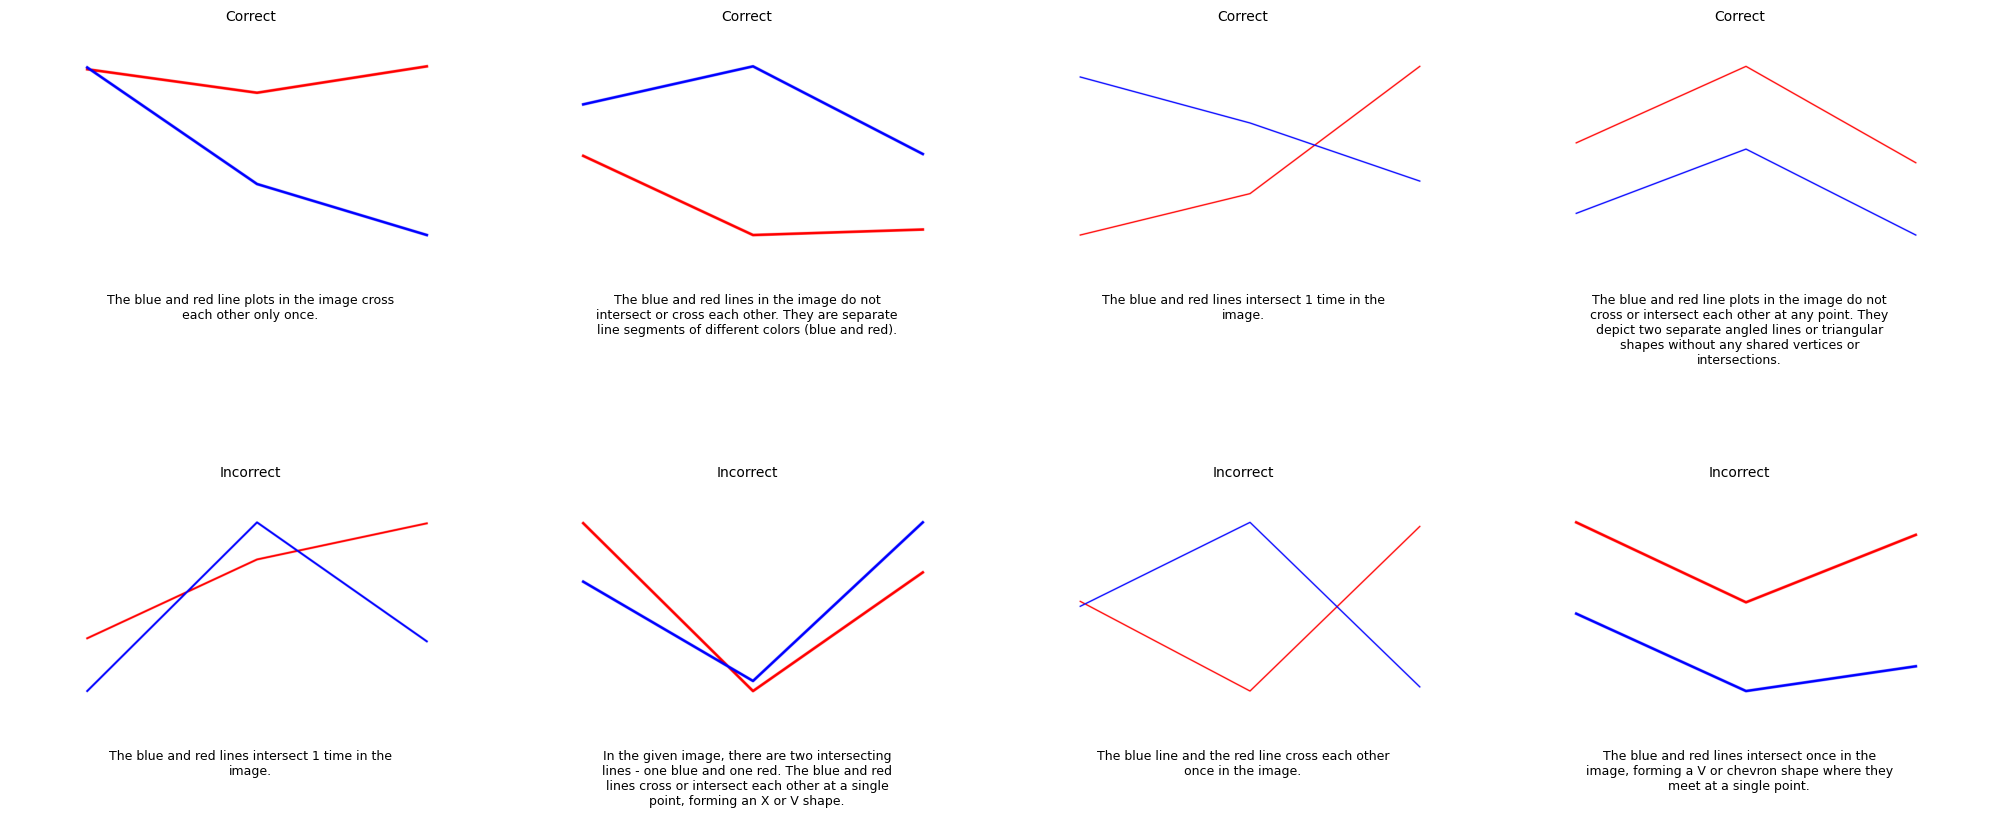

Model: Sonnet-3.5


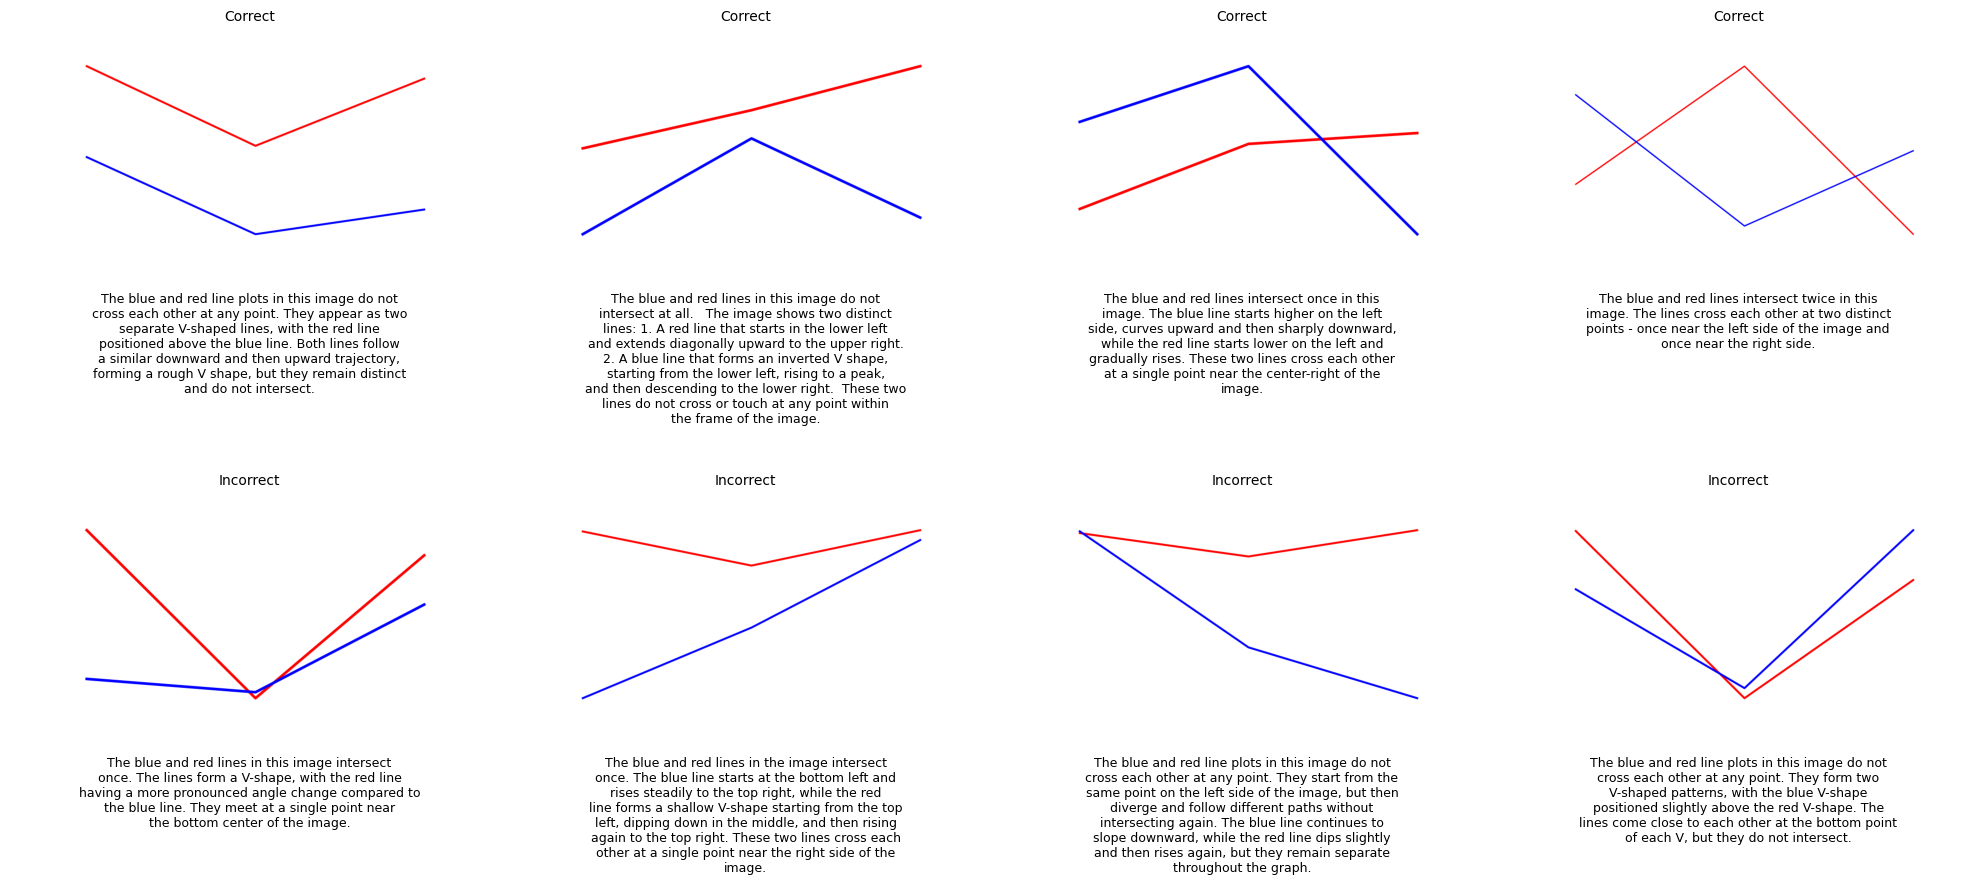

Model: gpt-4o


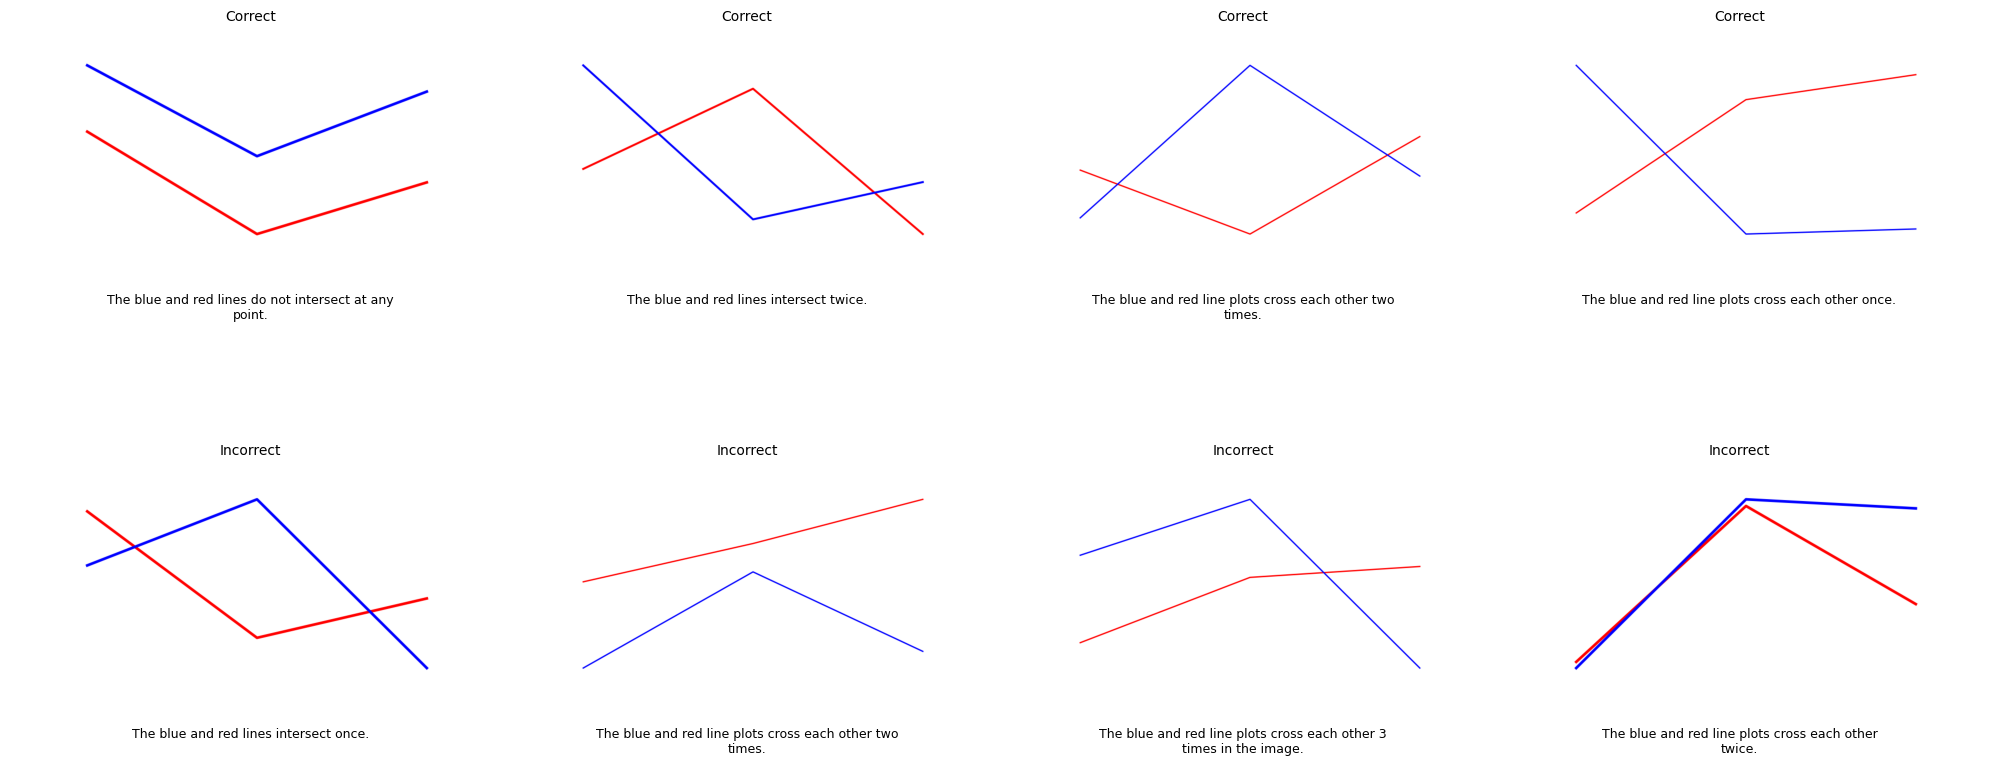

Model: Gemini-1.5-Pro


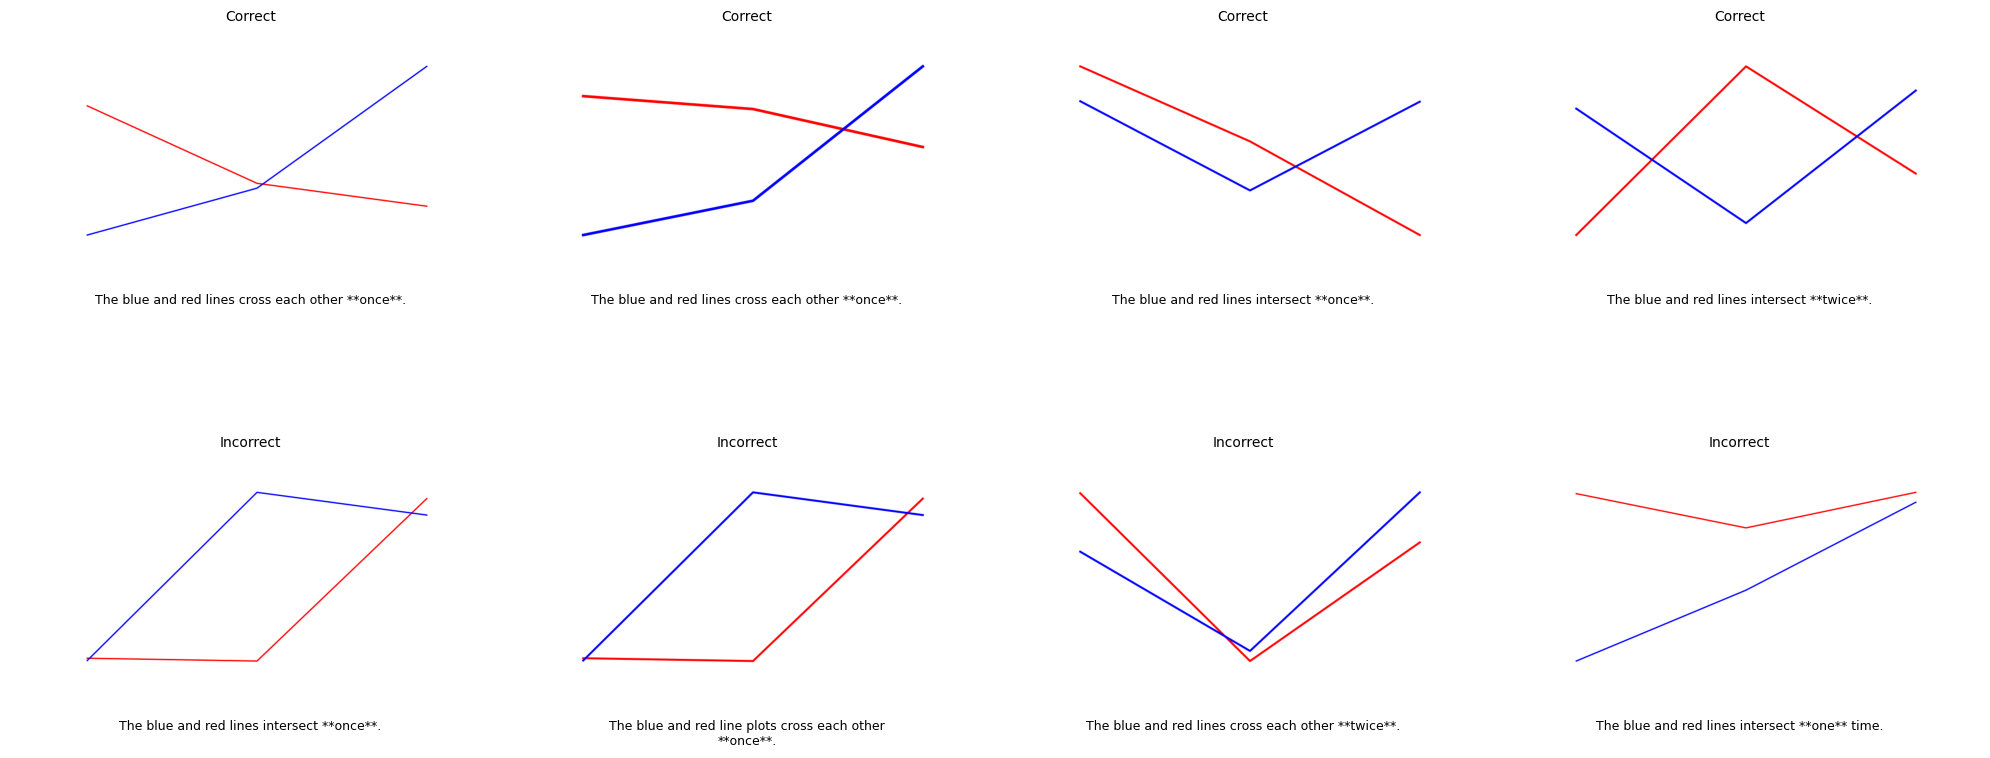

In [50]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[(df["Model"] == model) & (df["is_correct"] == True)]
        incorrect_predictions = df[(df["Model"] == model) & (df["is_correct"] == False)]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=1)
        sample_incorrect = incorrect_predictions.sample(4, random_state=1)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./images/{row['image_path']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            ax.set_title(
                f"{'Correct' if row['is_correct'] else 'Incorrect'}", fontsize=10
            )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model_output_raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

# Qual Samples

In [51]:
import pandas as pd


# Function to find and display entries where all models failed
def display_failed_predictions(df):
    # Group by 'image_name' and filter where all 'is_correct' values are False
    failed_df = df.groupby("image_path").filter(lambda x: all(x["is_correct"] == False))

    # Check if there are any entries where all models failed
    if not failed_df.empty:
        print("Entries where all models failed:")
        display(failed_df)
    else:
        print("No entries found where all models failed.")

    # group by image_path and show is_correct for differnt Model
    failed_df.groupby("image_path")["is_correct"].value_counts().unstack()
    display(failed_df.groupby("image_path")["is_correct"].value_counts().unstack())


# Call the function
display_failed_predictions(df)

Entries where all models failed:


,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
75,image_25_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots cross each other o...,1,False,Sonnet,How many times do the blue and red line plots ...
115,image_38_thickness_3.png,3,0,"[red, blue]",3,The blue and red line segments in the image in...,1,False,Sonnet,How many times do the blue and red line plots ...
116,image_38_thickness_4.png,3,0,"[red, blue]",4,The blue and red line plots intersect or cross...,1,False,Sonnet,How many times do the blue and red line plots ...
75,image_25_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots in this image cros...,1,False,Sonnet-3.5,How many times do the blue and red line plots ...
115,image_38_thickness_3.png,3,0,"[red, blue]",3,The blue and red line plots in this image cros...,1,False,Sonnet-3.5,How many times do the blue and red line plots ...
116,image_38_thickness_4.png,3,0,"[red, blue]",4,The blue and red line plots in this image cros...,1,False,Sonnet-3.5,How many times do the blue and red line plots ...
75,image_25_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots cross each other 3...,3,False,gpt-4o,How many times do the blue and red line plots ...
115,image_38_thickness_3.png,3,0,"[red, blue]",3,The blue and red line plots cross each other o...,1,False,gpt-4o,How many times do the blue and red line plots ...
116,image_38_thickness_4.png,3,0,"[red, blue]",4,The blue and red line plots cross each other o...,1,False,gpt-4o,How many times do the blue and red line plots ...
75,image_25_thickness_2.png,3,2,"[red, blue]",2,The blue and red lines cross each other **once...,1,False,Gemini-1.5-Pro,How many times do the blue and red line plots ...


is_correct,False
image_path,
image_25_thickness_2.png,8
image_38_thickness_3.png,8
image_38_thickness_4.png,8


In [43]:
import pandas as pd


# Function to find and display entries where at least two models failed
def display_at_least_two_failed_predictions(df):
    # Group by 'image_name' and filter where at least two 'is_correct' values are False
    failed_df = df.groupby("image_path").filter(
        lambda x: x["is_correct"].value_counts().get(False, 0) >= 3
    )

    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        display(failed_df)
    else:
        print("No entries found where at least two models failed.")

    # group by image_path and show is_correct for differnt Model
    failed_df.groupby("image_path")["is_correct"].value_counts().unstack()
    display(failed_df.groupby("image_path")["is_correct"].value_counts().unstack())


# Call the function
display_at_least_two_failed_predictions(df)

Entries where at least three models failed:


,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
3,image_1_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots cross each other a...,1,False,Sonnet,How many times do the blue and red line plots ...
5,image_1_thickness_4.png,3,2,"[red, blue]",4,"In the provided image, the blue line and the r...",1,False,Sonnet,How many times do the blue and red line plots ...
18,image_6_thickness_2.png,3,0,"[red, blue]",2,The blue and red line plots intersect or cross...,1,False,Sonnet,How many times do the blue and red line plots ...
19,image_6_thickness_3.png,3,0,"[red, blue]",3,"In the given image, the blue line and the red ...",1,False,Sonnet,How many times do the blue and red line plots ...
20,image_6_thickness_4.png,3,0,"[red, blue]",4,The blue and red line plots intersect or cross...,1,False,Sonnet,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
147,image_49_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines do not intersect in the...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
148,image_49_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect **zero** time...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...


is_correct,False,True
image_path,,
image_11_thickness_2.png,6.0,2.0
image_11_thickness_3.png,6.0,2.0
image_11_thickness_4.png,6.0,2.0
image_13_thickness_2.png,4.0,4.0
image_13_thickness_3.png,3.0,5.0
...,...,...
image_6_thickness_3.png,5.0,3.0
image_6_thickness_4.png,5.0,3.0
image_8_thickness_2.png,3.0,5.0


In [44]:
df_prompt1 = df[
    df["prompt"] == "How many times do the blue and red line plots cross each other?"
]
df_prompt2 = df[df["prompt"] == "How many times do the blue and red lines intersect?"]
display(df_prompt1)
display(df_prompt2)

,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
0,image_0_thickness_2.png,3,1,"[red, blue]",2,The blue and red line segments intersect or cr...,1,True,Sonnet,How many times do the blue and red line plots ...
1,image_0_thickness_3.png,3,1,"[red, blue]",3,The blue and red line segments intersect or cr...,1,True,Sonnet,How many times do the blue and red line plots ...
2,image_0_thickness_4.png,3,1,"[red, blue]",4,The blue and red line segments cross each othe...,1,True,Sonnet,How many times do the blue and red line plots ...
3,image_1_thickness_2.png,3,2,"[red, blue]",2,The blue and red line plots cross each other a...,1,False,Sonnet,How many times do the blue and red line plots ...
4,image_1_thickness_3.png,3,2,"[red, blue]",3,The blue and red line segments intersect or cr...,1,False,Sonnet,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,The blue and red lines cross each other **twic...,2,True,Gemini-1.5-Pro,How many times do the blue and red line plots ...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,The blue and red lines cross each other **twic...,2,True,Gemini-1.5-Pro,How many times do the blue and red line plots ...
147,image_49_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines cross each other **zero...,0,True,Gemini-1.5-Pro,How many times do the blue and red line plots ...
148,image_49_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines cross each other **once...,1,False,Gemini-1.5-Pro,How many times do the blue and red line plots ...


,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
0,image_0_thickness_2.png,3,1,"[red, blue]",2,The blue and red lines intersect at one point ...,1,True,Sonnet,How many times do the blue and red lines inter...
1,image_0_thickness_3.png,3,1,"[red, blue]",3,The blue and red lines intersect at one point ...,1,True,Sonnet,How many times do the blue and red lines inter...
2,image_0_thickness_4.png,3,1,"[red, blue]",4,The blue and red lines intersect once in the i...,1,True,Sonnet,How many times do the blue and red lines inter...
3,image_1_thickness_2.png,3,2,"[red, blue]",2,The blue and red lines intersect once in the i...,1,False,Sonnet,How many times do the blue and red lines inter...
4,image_1_thickness_3.png,3,2,"[red, blue]",3,"In the given image, the blue and red lines int...",1,False,Sonnet,How many times do the blue and red lines inter...
...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
147,image_49_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines do not intersect in the...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
148,image_49_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect **zero** time...,0,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...


In [45]:
import os
import pandas as pd
from PIL import Image
import shutil


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df, prompt_id):
    # Group by 'image_name' and filter where at least two 'is_correct' values are False
    failed_df = df.groupby("image_path").filter(
        lambda x: x["is_correct"].value_counts().get(False, 0) >= 3
    )

    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="image_path", columns="Model", values="is_correct", aggfunc="first"
        )

        # Display the pivoted DataFrame
        display(pivoted_df)

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("image_path"):
            details = [
                f"gt_{group.iloc[0]['num_intersections']}"
            ]  # Start with ground truth label
            for _, row in group.iterrows():
                details.append(f"{row['Model']}_{row['extracted_number']}")

            detailed_filename = (
                "_".join(details) + "_" + image_name + "_prompt" + prompt_id + ".pdf"
            )
            img_path = f"./images/{image_name}".replace(".png", ".pdf")
            new_filename = detailed_filename.replace(".png", ".pdf")

            shutil.copy(img_path, os.path.join(base_dir, new_filename))

    else:
        print("No entries found where at least two models failed.")


# Call the function
save_failed_model_outputs(df_prompt1, "1")
save_failed_model_outputs(df_prompt2, "2")

Entries where at least three models failed:


,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
19,image_6_thickness_3.png,3,0,"[red, blue]",3,"In the given image, the blue line and the red ...",1,False,Sonnet,How many times do the blue and red line plots ...
20,image_6_thickness_4.png,3,0,"[red, blue]",4,The blue and red line plots intersect or cross...,1,False,Sonnet,How many times do the blue and red line plots ...
33,image_11_thickness_2.png,3,0,"[red, blue]",2,The blue and red line plots intersect or cross...,1,False,Sonnet,How many times do the blue and red line plots ...
34,image_11_thickness_3.png,3,0,"[red, blue]",3,The blue and red line segments cross each othe...,1,False,Sonnet,How many times do the blue and red line plots ...
35,image_11_thickness_4.png,3,0,"[red, blue]",4,The blue and red line plots cross each other o...,1,False,Sonnet,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...
115,image_38_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines cross each other **one*...,1,False,Gemini-1.5-Pro,How many times do the blue and red line plots ...
116,image_38_thickness_4.png,3,0,"[red, blue]",4,The blue and red lines cross each other **one*...,1,False,Gemini-1.5-Pro,How many times do the blue and red line plots ...
132,image_44_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines cross each other **one*...,1,False,Gemini-1.5-Pro,How many times do the blue and red line plots ...
133,image_44_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines cross each other **one*...,1,False,Gemini-1.5-Pro,How many times do the blue and red line plots ...


Model,Gemini-1.5-Pro,Sonnet,Sonnet-3.5,gpt-4o
image_path,,,,
image_11_thickness_2.png,False,False,True,False
image_11_thickness_3.png,False,False,True,False
image_11_thickness_4.png,False,False,True,False
image_16_thickness_2.png,False,False,True,False
image_16_thickness_4.png,False,False,True,False
image_17_thickness_3.png,False,False,True,False
image_17_thickness_4.png,False,False,True,False
image_21_thickness_4.png,True,False,False,False
image_24_thickness_2.png,False,False,False,False


Entries where at least three models failed:


,image_path,num_points,num_intersections,line_colors,line_thickness,model_output_raw,extracted_number,is_correct,Model,prompt
33,image_11_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines intersect only once in ...,1,False,Sonnet,How many times do the blue and red lines inter...
34,image_11_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect 1 time in the...,1,False,Sonnet,How many times do the blue and red lines inter...
35,image_11_thickness_4.png,3,0,"[red, blue]",4,The blue and red lines intersect 2 times in th...,2,False,Sonnet,How many times do the blue and red lines inter...
52,image_17_thickness_3.png,3,1,"[red, blue]",3,"In the given image, the blue and red lines int...",1,True,Sonnet,How many times do the blue and red lines inter...
75,image_25_thickness_2.png,3,2,"[red, blue]",2,The blue and red lines intersect once in the i...,1,False,Sonnet,How many times do the blue and red lines inter...
...,...,...,...,...,...,...,...,...,...,...
115,image_38_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,How many times do the blue and red lines inter...
116,image_38_thickness_4.png,3,0,"[red, blue]",4,The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,How many times do the blue and red lines inter...
132,image_44_thickness_2.png,3,0,"[red, blue]",2,The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,How many times do the blue and red lines inter...
133,image_44_thickness_3.png,3,0,"[red, blue]",3,The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,How many times do the blue and red lines inter...


Model,Gemini-1.5-Pro,Sonnet,Sonnet-3.5,gpt-4o
image_path,,,,
image_11_thickness_2.png,False,False,True,False
image_11_thickness_3.png,False,False,True,False
image_11_thickness_4.png,False,False,True,False
image_17_thickness_3.png,False,True,False,False
image_25_thickness_2.png,False,False,False,False
image_25_thickness_3.png,False,False,False,False
image_25_thickness_4.png,False,False,False,True
image_29_thickness_2.png,False,False,True,False
image_29_thickness_4.png,False,False,True,False
